In [78]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [3]:
# Export Dataset 1 (core.csv)

df1 = pd.read_csv("core.csv")
df1.head()

,Name,ID,Country,Website,Groups,Region,Stage,Sector,Description,AI_Publications,...,Knowledge_Representation,Language_Processing,Measuring_n_Testing,Planning_n_Scheduling,Robotics,Speech_Processing,Workforce_AI_workers,Workforce_Tech_Team_Workers,City,State/province
0,Accenture Plc,803,Ireland,https://www.accenture.com/,S&P 500,Europe,Mature,Software & IT Services,"Accenture is a professional services company, ...",208,...,102,33,13,129,0,23,13610,166212,Dublin,Dublin
1,Cognizant,806,United States,https://www.cognizant.com,S&P 500,North America,Mature,Software & IT Services,"Cognizant is a professional services company, ...",209,...,12,1,0,7,0,5,5226,130530,Teaneck,New Jersey
2,Amazon,23,United States,http://amazon.com,"S&P 500, Global Big Tech",North America,Mature,Retailers,Amazon is a global tech firm with a focus on e...,3313,...,135,23,179,131,9,265,14164,128591,Seattle,Washington
3,IBM,115,United States,http://www.ibm.com/,"S&P 500, Global Big Tech",North America,Mature,Software & IT Services,IBM is an IT technology and consulting firm pr...,7428,...,1753,386,296,828,4,471,6114,117521,Armonk,New York
4,Microsoft,163,United States,http://www.microsoft.com,"S&P 500, Global Big Tech, GenAI Contenders",North America,Mature,Software & IT Services,Microsoft is a software corporation that devel...,9807,...,468,214,61,550,0,365,5245,104414,Redmond,Washington


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Name                              678 non-null    object 
 1   ID                                678 non-null    int64  
 2   Country                           675 non-null    object 
 3   Website                           675 non-null    object 
 4   Groups                            520 non-null    object 
 5   Region                            675 non-null    object 
 6   Stage                             678 non-null    object 
 7   Sector                            678 non-null    object 
 8   Description                       671 non-null    object 
 9   AI_Publications                   678 non-null    int64  
 10  AI_Growth                         330 non-null    float64
 11  Percentage                        678 non-null    float64
 12  Conferen

In [5]:
# Export Dataset 2 (ticker.csv)

df2 = pd.read_csv("ticker.csv")
df2.head()

,Name,ID,Ticker,Exchange
0,C. H. Robinson Worldwide,2239,CHRW,NASDAQ
1,Kraft Heinz,2161,KHC,NASDAQ
2,Fastenal,2316,FAST,NASDAQ
3,Splunk,237,SPLK,NASDAQ
4,Kroger,1813,KR,NYSE


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      711 non-null    object
 1   ID        711 non-null    int64 
 2   Ticker    711 non-null    object
 3   Exchange  711 non-null    object
dtypes: int64(1), object(3)
memory usage: 22.3+ KB


In [7]:
# Filtering out important col
df = df1[["Name", "AI patents", "AI_Publications", "Workforce_AI_workers", "Workforce_Tech_Team_Workers"]]
df.head()

,Name,AI patents,AI_Publications,Workforce_AI_workers,Workforce_Tech_Team_Workers
0,Accenture Plc,489,208,13610,166212
1,Cognizant,77,209,5226,130530
2,Amazon,1819,3313,14164,128591
3,IBM,8724,7428,6114,117521
4,Microsoft,3728,9807,5245,104414


In [8]:
df1.columns

Index(['Name', 'ID', 'Country', 'Website', 'Groups', 'Region', 'Stage',
       'Sector', 'Description', 'AI_Publications', 'AI_Growth', 'Percentage',
       'Conference_Publication', 'Citations', 'CV_publications',
       'NLP_publications', 'Robotics_publications', 'Total_Publications',
       'AI patents', 'Patents_Growth', 'Patent_Percentage',
       'Granted_AI_patents', 'Total_patents', 'Agriculture',
       'Banking_n_Finance', 'Business', 'Computing_In_Government',
       'Document_Management_n_Publishing', 'Education', 'Energy',
       'Entertainment', 'Industry_n_Manufacturing', 'Life_Sciences',
       'Military', 'Nanotechnology', 'Networking',
       'Personal_Devices_N_Computing', 'Physical_Sciences_n_Engineering',
       'Security', 'Semiconductors', 'Telecommunications', 'Transportation',
       'Analytics_n_Algorithms', 'Computer_Vision', 'Control',
       'Distributed_AI', 'Knowledge_Representation', 'Language_Processing',
       'Measuring_n_Testing', 'Planning_n_Sched

# PLOTS

Dependant Varaibles: AI patents, AI_Publications

Independant Variable: Workforce_AI_workers, Workforce_Tech_Team_Workers

In [74]:
# Scateer Plots

fig = make_subplots(rows=2, cols=2, 
                    subplot_titles=("AI Patents vs AI Workers", 
                                    "AI Patents vs Tech Team Workers", 
                                    "AI Publications vs AI Workers", 
                                    "AI Publications vs Tech Team Workers"))

fig.add_trace(
    go.Scatter(x=df["AI patents"], y=df["Workforce_AI_workers"], mode='markers'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=df["AI patents"], y=df["Workforce_Tech_Team_Workers"], mode='markers'),
    row=1, col=2
)

fig.add_trace(
    go.Scatter(x=df["AI_Publications"], y=df["Workforce_AI_workers"], mode='markers'),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=df["AI_Publications"], y=df["Workforce_Tech_Team_Workers"], mode='markers'),
    row=2, col=2
)   

# Labeling Axis
fig['layout']['xaxis']['title']='AI Patents'
fig['layout']['yaxis']['title']='AI Worker'
fig['layout']['xaxis2']['title']='AI Patents'
fig['layout']['yaxis2']['title']='Tech Team Workers'
fig['layout']['xaxis3']['title']='AI Publication'
fig['layout']['yaxis3']['title']='AI Worker'
fig['layout']['xaxis4']['title']='AI Publication'
fig['layout']['yaxis4']['title']='Tech Team Workers'

fig.update_layout(height=800, width=1000, title_text="Scatter Plots")
fig.show()

Pearson Correlation Coefficient (r): This measures the linear relationship between two continuous variables. The coefficient ranges from -1 to +1:​
- +1 indicates a perfect positive linear relationship.
- -1 indicates a perfect negative linear relationship.
- 0 indicates no linear relationship.​

0.00 to 0.30: Negligible to low positive correlation​

0.30 to 0.50: Low to moderate positive correlation​

0.50 to 0.70: Moderate to strong positive correlation​

0.70 to 1.00: Strong to very strong positive correlation

In [10]:
# Extrating correlation between independant and dependant variable

corr_matrix = df.corr()
corr_matrix.iloc[2:].iloc[:,:2]

,AI patents,AI_Publications
Workforce_AI_workers,0.294977,0.449261
Workforce_Tech_Team_Workers,0.374685,0.567685


In [11]:
# Correlation Heatmap

fig = px.imshow(corr_matrix.iloc[2:].iloc[:,:2], text_auto=True, title="Correlation Heatmap")

fig.show()

3d Plots

In [75]:
# 3D Plot (AI Patent vs Workforce_Al_workers and Workforce_Tech_Team_Worker)
fig = px.scatter_3d(
    df,
    x='AI patents',
    y='Workforce_Tech_Team_Workers',
    z='Workforce_AI_workers',
    title='AI Patents vs Workforce_Al_workers and Workforce_Tech_Team_Workers'
)

fig.update_layout(
    title='AI Patent vs Al Workers and Tech Team Worker', 
    autosize=False,
    width=900, 
    height=900,
    scene=dict(
        xaxis_title='AI Patents',
        yaxis_title='Tech Team Workers',
        zaxis_title='AI Workers',
    ),
)

fig.show()
fig.write_html("3d_plot_patents.html")

In [76]:
# 3D Plot (AI Publication vs Workforce_Al_workers and Workforce_Tech_Team_Worker)

fig = px.scatter_3d(
    df,
    x='AI_Publications',
    y='Workforce_Tech_Team_Workers',
    z='Workforce_AI_workers',
)

fig.update_layout(
    title='AI Publications vs Al workers and Tech Team Worker', 
    autosize=False,
    width=900, 
    height=900,
    scene=dict(
        xaxis_title='AI Publications',
        yaxis_title='Tech Team Workers',
        zaxis_title='AI Workers',
    ),
)

fig.show()
fig.write_html("3d_plot_publications.html")

# Removing Outlier

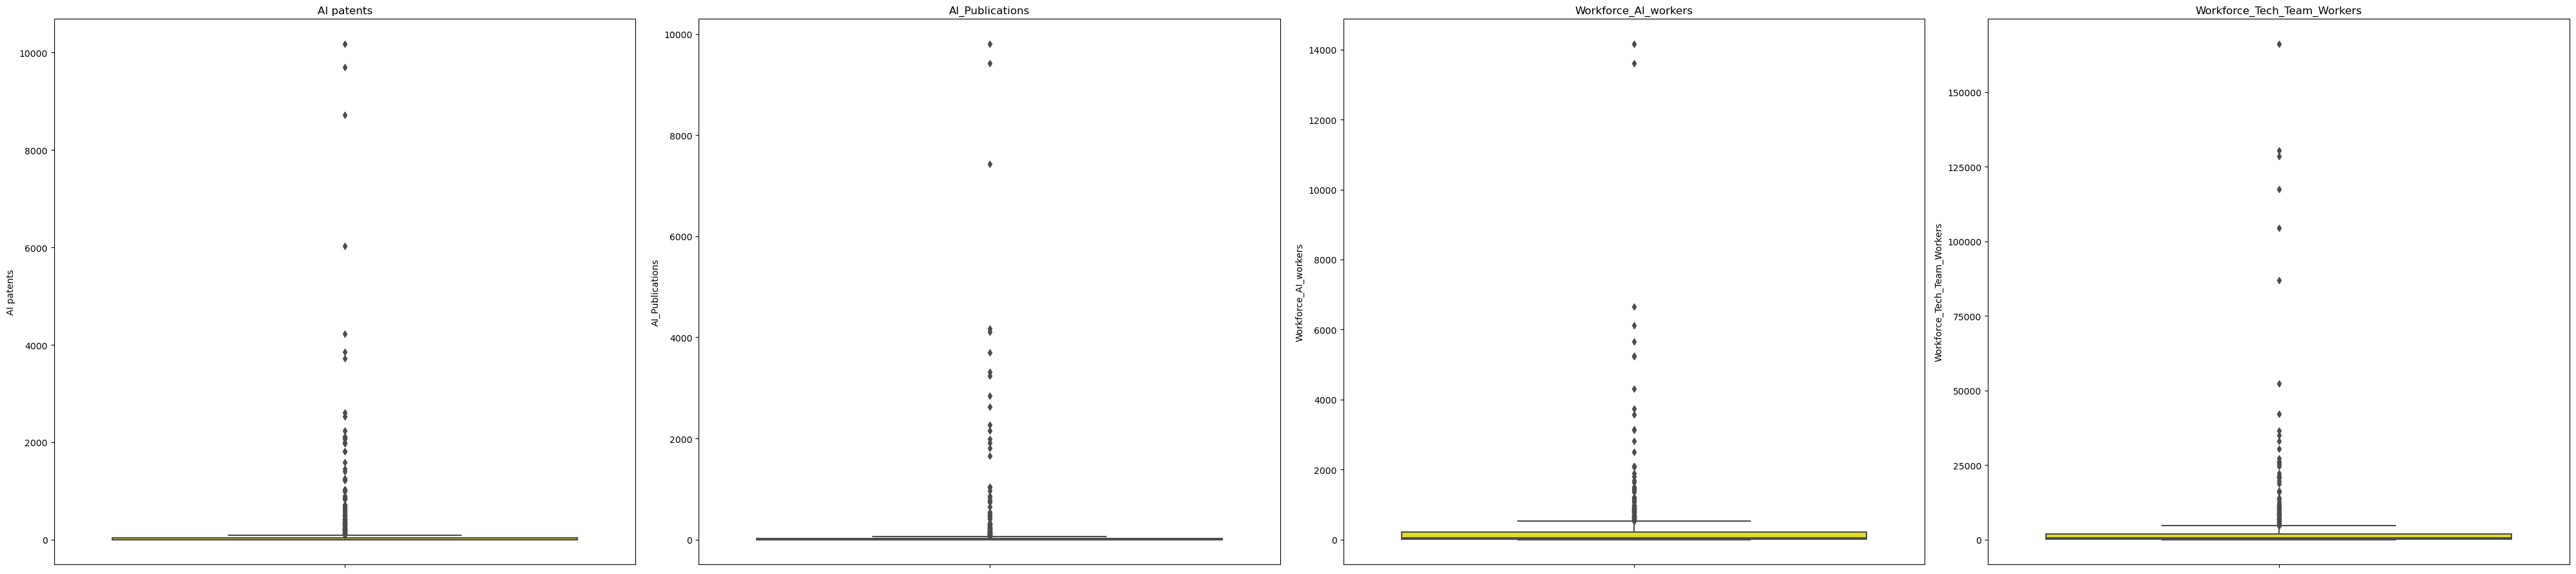

In [ ]:
# Box plot on both dependant and independant variable to identify outliers

df_outlier = df.drop(['Name'], axis=1)

fig, axMany = plt.subplots(1, (len(df_outlier.columns)), figsize=(40,9))
 
colCnt = 0
for item in df_outlier.columns :
    sns.boxplot(y=df_outlier[item] ,color='yellow',  ax=axMany[colCnt]).set_title(item)
    colCnt = colCnt + 1
    plt.tight_layout()

plt.show()

In [ ]:
# Function to identify outliers present using z score with a threshold of 3
def detect_outliers_zscore(data, column, threshold=3):
    mean = data[column].mean()
    std = data[column].std()
    z_scores = (data[column] - mean) / std
    data = data[np.abs(z_scores) > threshold]
    outlier = data['Name'].values
    
    return outlier

In [ ]:
# Consolidating Outliers present in both dependant and independant variable
outliers = []
for i in df_outlier.columns:
    outliers.extend(detect_outliers_zscore(df, i))
    
outliers = list(set(outliers))
outliers

['Baidu',
 'Huawei',
 'Tencent',
 'Bosch',
 'Siemens',
 'Amazon',
 'Wells Fargo',
 'Alibaba',
 'Meta',
 'Intel',
 'Apple',
 'Accenture Plc',
 'Samsung',
 'IBM',
 'Ernst & Young',
 'Cognizant',
 'Oracle',
 'Alphabet (including Google)',
 'Deloitte Touche Tohmatsu',
 'Microsoft']

In [ ]:
# Filtering out the outliers
removed_outlier_df = df[~df['Name'].isin(outliers)]
removed_outlier_df.head()

,Name,AI patents,AI_Publications,Workforce_AI_workers,Workforce_Tech_Team_Workers
9,Cisco Systems,840,280,1094,35000
10,EPAM Systems,0,10,975,33120
11,DXC Technology,7,18,972,30554
15,AT&T,490,217,1459,25357
16,Nokia,869,781,470,24632


In [ ]:
# Shape of data after removing outliers

df.shape, removed_outlier_df.shape

((678, 5), (658, 5))

In [134]:
corr_matrix = removed_outlier_df.corr()
corr_matrix.iloc[2:].iloc[:,:2]

,AI patents,AI_Publications
Workforce_AI_workers,0.234525,0.171227
Workforce_Tech_Team_Workers,0.371044,0.289797


In [135]:
# Correlation Heatmap

fig = px.imshow(corr_matrix.iloc[2:].iloc[:,:2], text_auto=True, title="Correlation Heatmap")

fig.show()

Through the removal of outliers, we can see that the the correlation between the AI Publications and scale of tech workforce significantly declined. Since the outliers consist of majority of the larger organisationss, this may imply that there is a stronger positive correlation between AI_Publications and the scale of tech workforce for larger organisations thus influcing the overall correation to become higher.